## Statistical analysis

In this notebook we use _pandas_ and the _stats_ module from _scipy_ for some basic statistical analysis.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats 

import pandas as pd
 

We use pandas to load the _'adult'_ data set from the _UC Irvine Machine Learning Repository_ in our dataframe.

In [11]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"])
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Descriptive statistics 

Let's have a first look at the shape of our dataframe.

In [12]:
df.shape

(32561, 15)

We can calculate the mean, median, standard error of the mean (sem), variance, standard deviation (std) and the quantiles for every column in the dataframe

In [13]:
df.mean()

Age                   38.581647
fnlwgt            189778.366512
Education-Num         10.080679
Capital Gain        1077.648844
Capital Loss          87.303830
Hours per week        40.437456
dtype: float64

In [14]:
df.median()

Age                   37.0
fnlwgt            178356.0
Education-Num         10.0
Capital Gain           0.0
Capital Loss           0.0
Hours per week        40.0
dtype: float64

In [15]:
df.sem()

Age                 0.075593
fnlwgt            584.937250
Education-Num       0.014258
Capital Gain       40.927838
Capital Loss        2.233126
Hours per week      0.068427
dtype: float64

In [16]:
df.var()

Age               1.860614e+02
fnlwgt            1.114080e+10
Education-Num     6.618890e+00
Capital Gain      5.454254e+07
Capital Loss      1.623769e+05
Hours per week    1.524590e+02
dtype: float64

In [17]:
df.std()

Age                   13.640433
fnlwgt            105549.977697
Education-Num          2.572720
Capital Gain        7385.292085
Capital Loss         402.960219
Hours per week        12.347429
dtype: float64

In [18]:
df.quantile(q=0.5)

Age                   37.0
fnlwgt            178356.0
Education-Num         10.0
Capital Gain           0.0
Capital Loss           0.0
Hours per week        40.0
Name: 0.5, dtype: float64

In [19]:
df.quantile(q=[0.05, 0.95])

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
0.05,19.0,39460.0,5.0,0.0,0.0,18.0
0.95,63.0,379682.0,14.0,5013.0,0.0,60.0


In [20]:
df.Age.std()

13.640432553581341

In [21]:
df['Age'].count()

32561

In [22]:
df['Age'].mean()

38.581646755320783

In the next sample we replace a value with _None_ so that we can show how to hanlde missing values in a dataframe.

In [224]:
df_copy = df.copy()
df_copy.set_value(0, 'Age', None)
df_copy.ix[0:0]

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,NaN,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [225]:
df.isnull().values.any()

False

In [226]:
df_copy.isnull().values.any()

True

In [227]:
df_copy.isnull().sum()

Age               1
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Martial Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per week    0
Country           0
Target            0
dtype: int64

In [228]:
df_copy = df_copy.dropna()


In [229]:
df_copy.isnull().values.any()

False

In [230]:
df_copy = df.copy()

df_copy.set_value(0, 'Age', None)

df_copy['Age'] = df_copy['Age'].fillna(df_copy['Age'].median())

df_copy.ix[0:0]

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,37.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


## Inferential statistics

In [253]:
male = df[df['Sex'].str.contains('Male')]
female = df[df['Sex'].str.contains('Female')]

print(female.shape)
print(male.shape)

(10771, 15)
(21790, 15)


In [255]:
t, p = stats.ttest_ind(female['Age'], male['Age'])
print(t)
print(p)

-16.0925170119
4.82399306878e-58


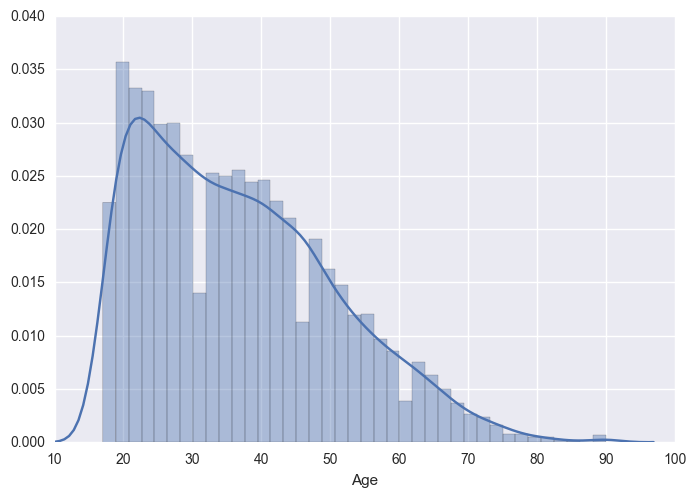

In [259]:
sns.distplot(female.Age)

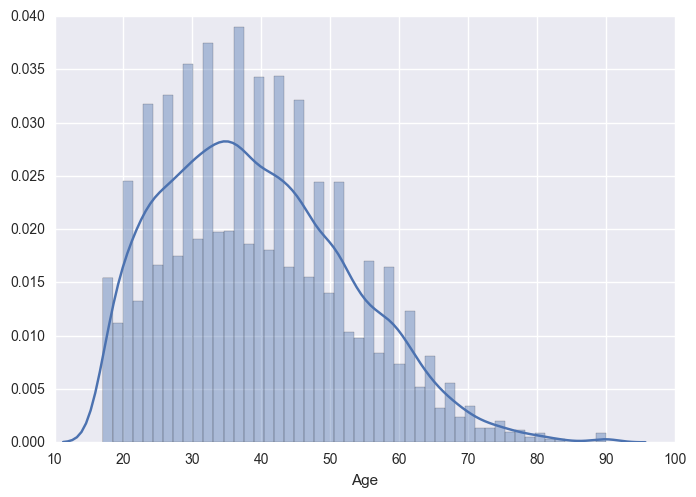

In [260]:
sns.distplot(male.Age)